# D208 PA 1 code - Doug Haunsperger
### Do initial package import and data read, using code from D206

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('medical_clean.csv')

#view first 5 rows
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


## Data Cleaning - C1
### Show variable names, non-null counts using `info()`

In [2]:
df.info()
df.isnull().sum()[df.isnull().sum() > 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

Series([], dtype: int64)

### Selecting variables to answer research question

For possible explanatory variables, I am casting a wide net, looking at demographic info as well as reported medical conditions.

In [3]:
# Target variable
target='Initial_days'
# Quantitative explanatory
quant_cols=['Population', 'Children', 'Age', 'Income', 'VitD_levels']
# Categorical explanatory
cat_cols = ['Marital', 'Soft_drink', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 
            'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

### Check for duplicate data
First, check for duplicate rows

In [4]:
df.duplicated().value_counts()

False    10000
dtype: int64

Check to see if there are any duplicate `Customer_id` values, perhaps with different data entered

In [5]:
df.duplicated(subset = ['Customer_id'], keep = False).value_counts()

False    10000
dtype: int64

Using the `medical_clean` dataset, all duplicates and nulls have already been removed. Next I'll check for outliers.

### Check for outliers

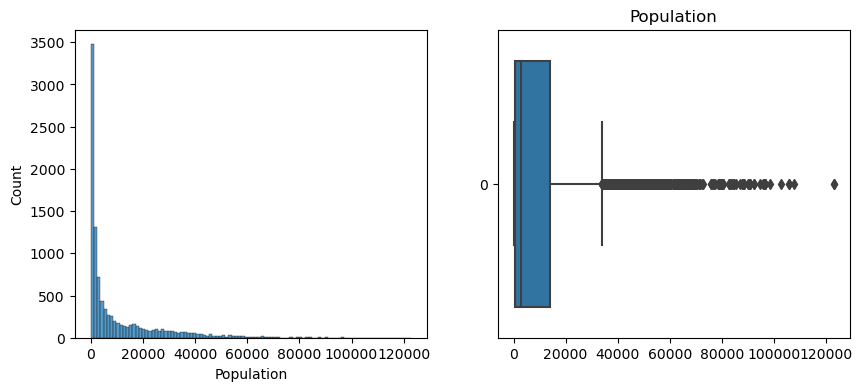

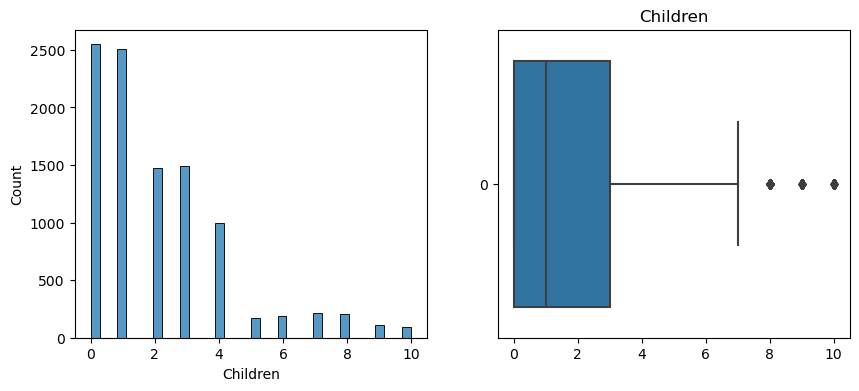

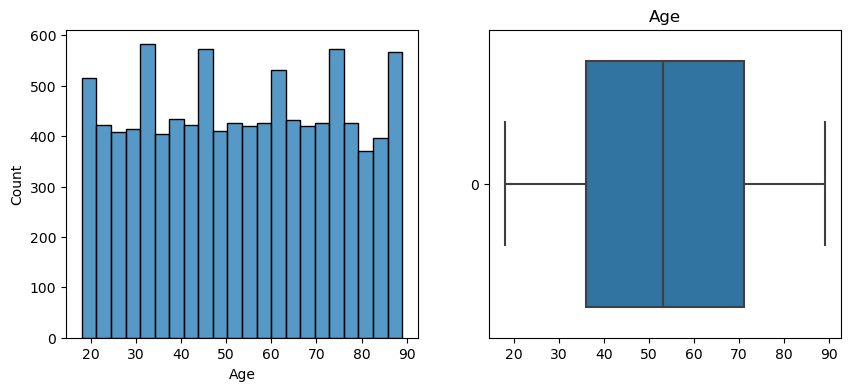

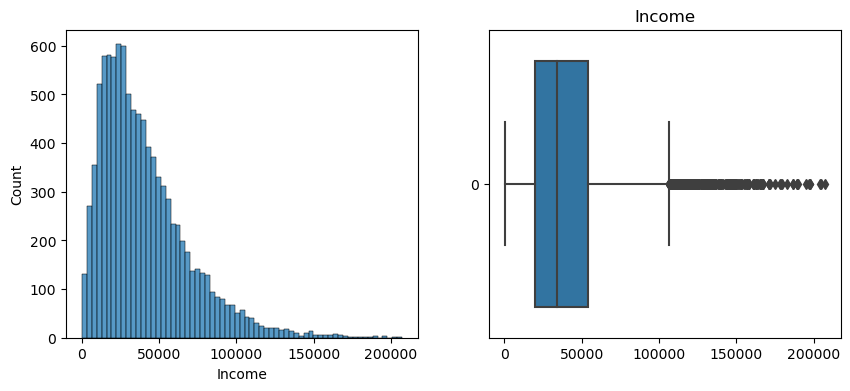

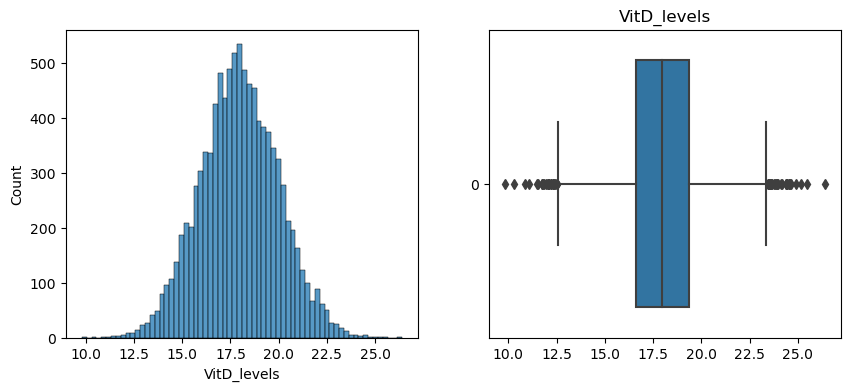

In [6]:
import seaborn as sns
# Choose only the quantitative columns

# Ref: https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell (Kassies, 2013)
for col in quant_cols:
    fig, axs = plt.subplots(1,2, figsize=(10,4))
    sns.histplot(df[col], ax=axs[0])
    plt.title(col)
    sns.boxplot(df[col], orient='h', ax=axs[1])
    plt.title(col)
    plt.show()

### Treating Outliers
I will use the same treatment methodologies I did with the data in D206.

#### Population
Population is reasonable to have a long-tail, right-skew distribution. However, zero values are not reasonable. They would also interfere with doing a log transformation later.

In [7]:
df[(df.Population == 0)].shape

(109, 50)

Removing `Population == 0` outliers from the data set and move them to a separate data frame

In [8]:
pop_outliers = df[(df.Population == 0)]
df.drop(df[(df.Population == 0)].index, inplace=True)
df.shape

(9891, 50)


#### Children

Exclude rows reporting 8 or more children as outliers - move them to a separate data frame.

In [9]:
chil_outliers = df[(df['Children'] >= 8)]
df.drop(df[(df['Children'] >= 8)].index, inplace=True)
df.shape

(9483, 50)

#### Age

Uniform distribution - no outliers

#### Income

Outlying values are within reason. Income levels of $207,000/year are expected in a population.

In [10]:
df['Income'].describe()

count      9483.000000
mean      40469.722345
std       28390.489229
min         300.790000
25%       19651.765000
50%       33872.380000
75%       54374.620000
max      207249.100000
Name: Income, dtype: float64

#### VitD_levels

The `VitD_levels` distribution appears normally distributed - no reason to exclude outliers.

## C2 - Summary Statistics

#### Target Variable

In [11]:
df[target].describe()

count    9483.000000
mean       34.391679
std        26.308051
min         1.001981
25%         7.850877
50%        31.563823
75%        61.120765
max        71.981490
Name: Initial_days, dtype: float64

#### Quantitative explanatory variables

In [12]:
df[quant_cols].describe()

,Population,Children,Age,Income,VitD_levels
count,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,10076.497627,1.812717,53.487082,40469.722345,17.965027
std,14870.421052,1.700075,20.632396,28390.489229,2.013126
min,1.000000,0.000000,18.000000,300.790000,9.806483
25%,735.000000,0.000000,36.000000,19651.765000,16.631182
50%,2860.000000,1.000000,53.000000,33872.380000,17.948704
75%,14144.000000,3.000000,71.000000,54374.620000,19.350621
max,122814.000000,7.000000,89.000000,207249.100000,26.394449


#### Categorical explanatory variables
For categorical values, describe() provides the number of unique values, the most frequent value `top`, and the number of times that value appears in the dataset `freq`  (Pandas.DataFrame.describe — Pandas 2.1.2 Documentation, n.d.)

In [13]:
df[cat_cols].describe()

,Marital,Soft_drink,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
count,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483,9483
unique,5,2,2,2,3,2,2,2,2,2,2,2,2,2
top,Widowed,No,No,No,Medium,Yes,No,No,No,No,No,No,No,No
freq,1941,7042,5610,7602,4291,6734,6090,6915,6279,5571,6447,5733,5564,6735


## C3 - Visualizations
### Univariate visualizations

#### Target Variable

<Axes: xlabel='Initial_days', ylabel='Count'>

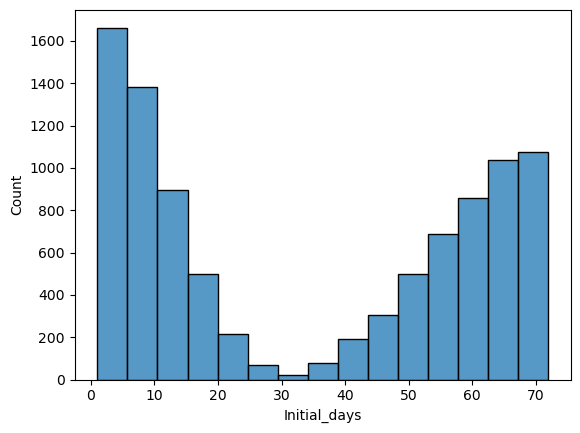

In [14]:
sns.histplot(x=df[target])

#### Quantitative explanatory variables

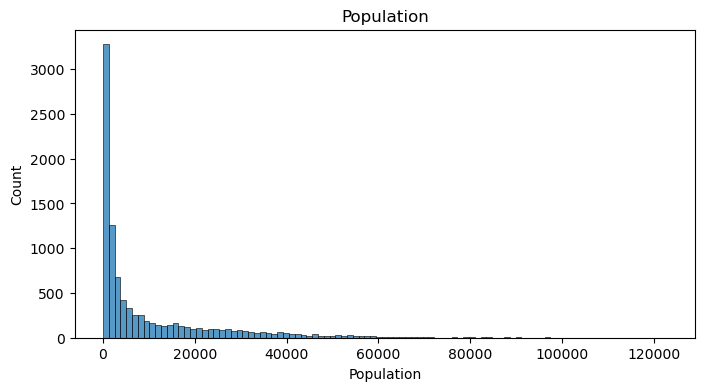

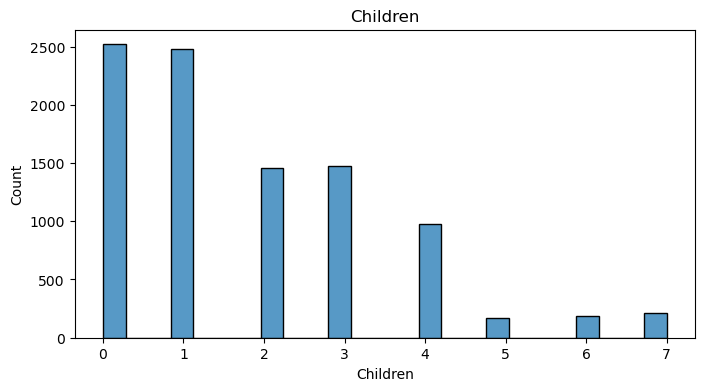

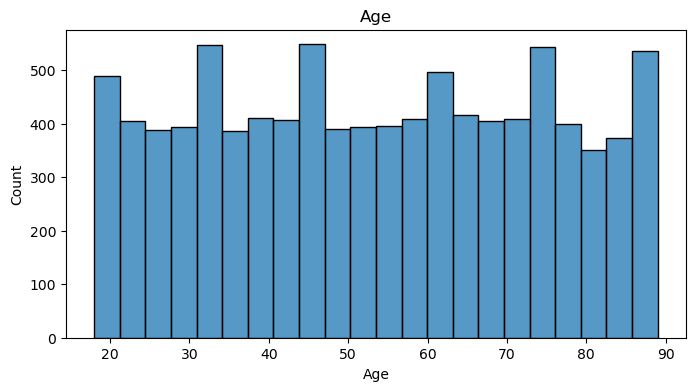

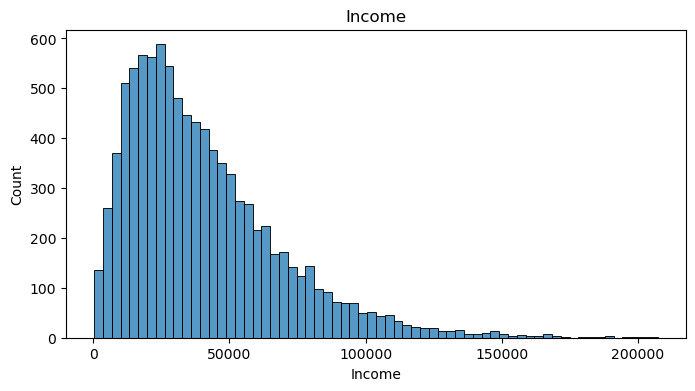

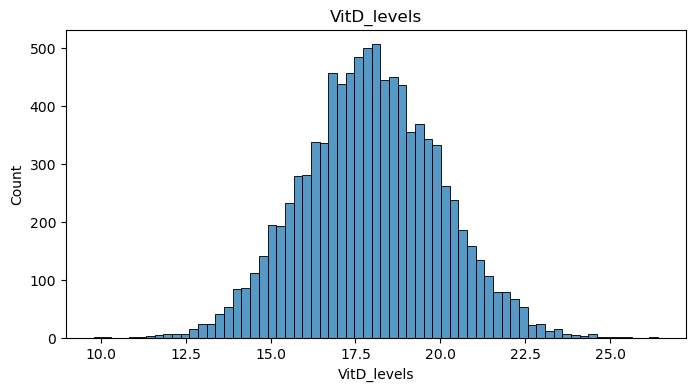

In [15]:
for col in quant_cols:
    fig, axs = plt.subplots(1,1, figsize=(8,4))
    sns.histplot(x=df[col])
    plt.title(col)
    plt.show

The right-skewed distributions `Population` and `Income` might benefit from a log-scale analysis

<Axes: xlabel='Population', ylabel='Count'>

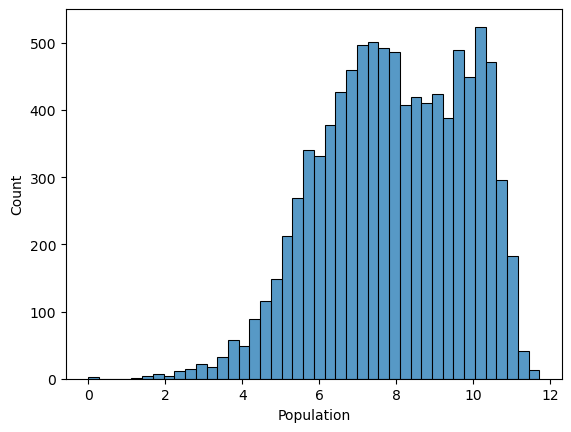

In [16]:
sns.histplot(np.log(df.Population))

<Axes: xlabel='Income', ylabel='Count'>

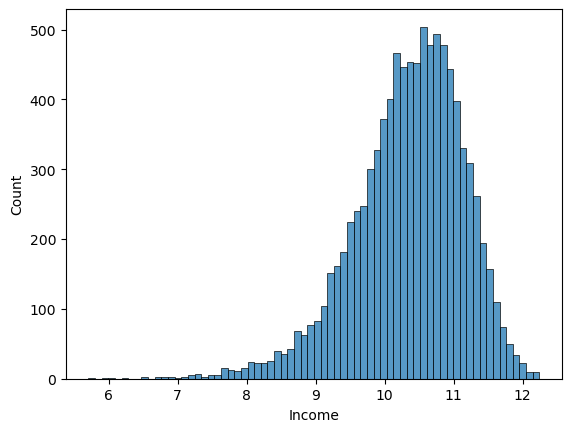

In [17]:
sns.histplot(np.log(df.Income))

#### Categorical explanatory variables

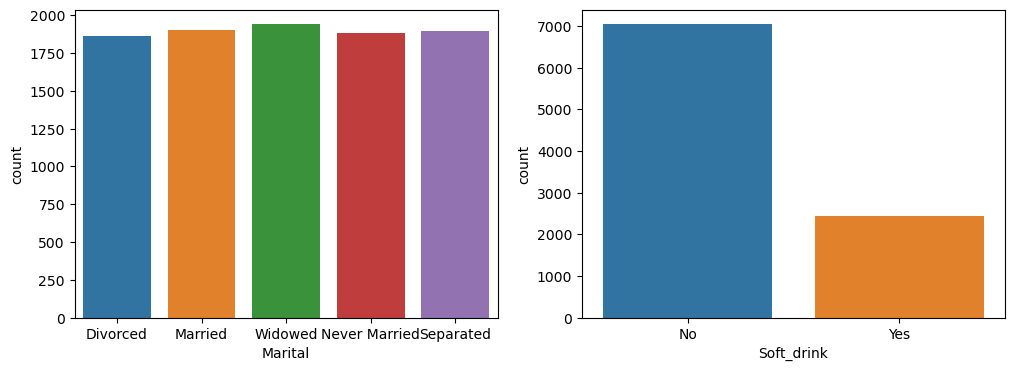

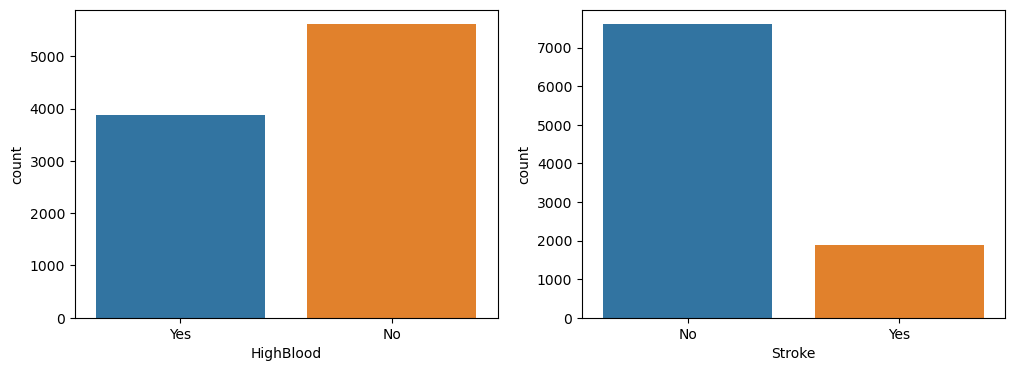

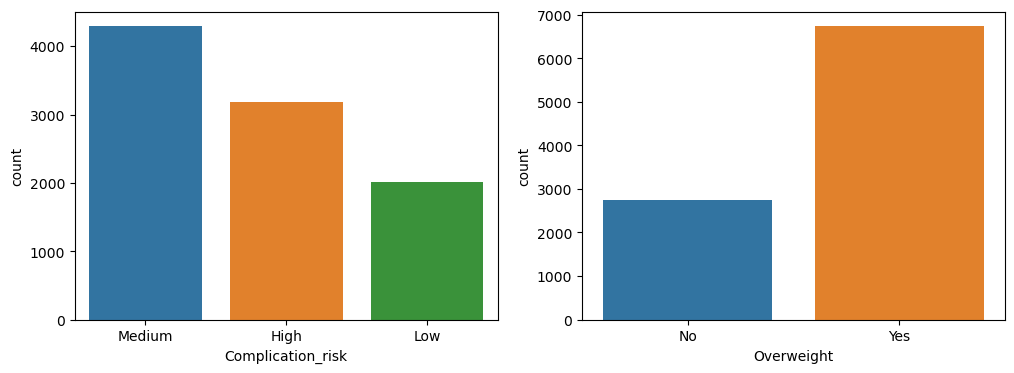

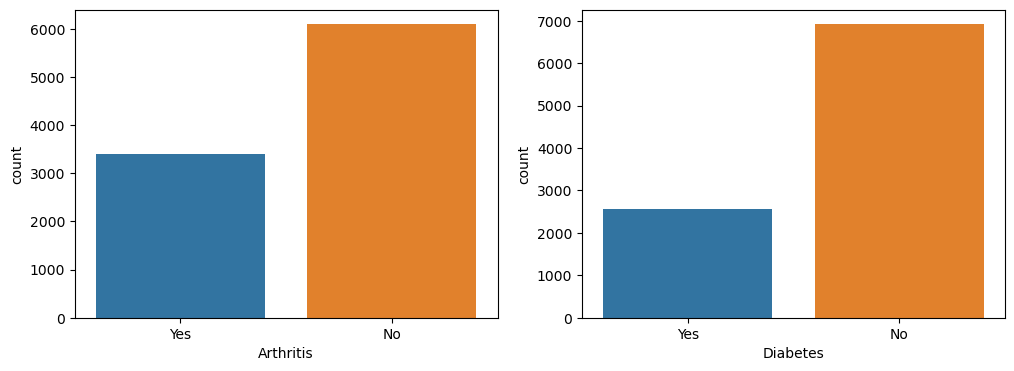

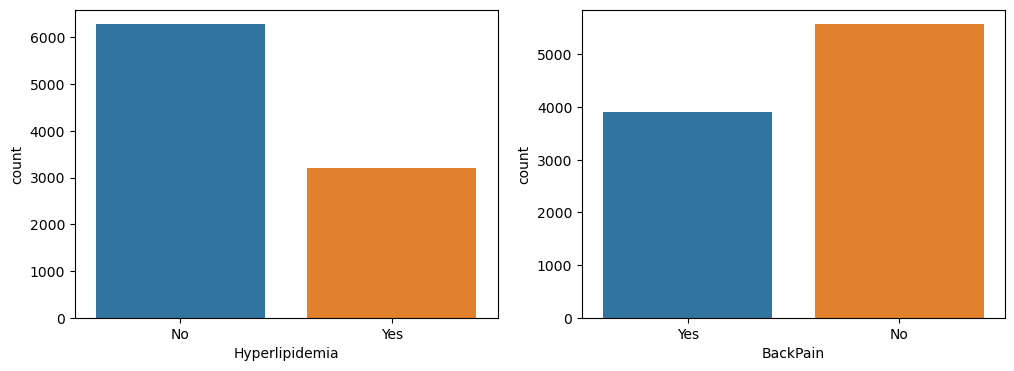

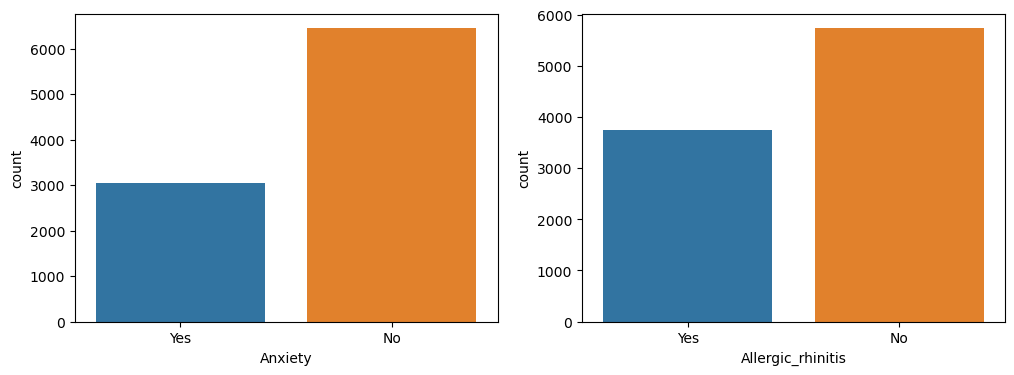

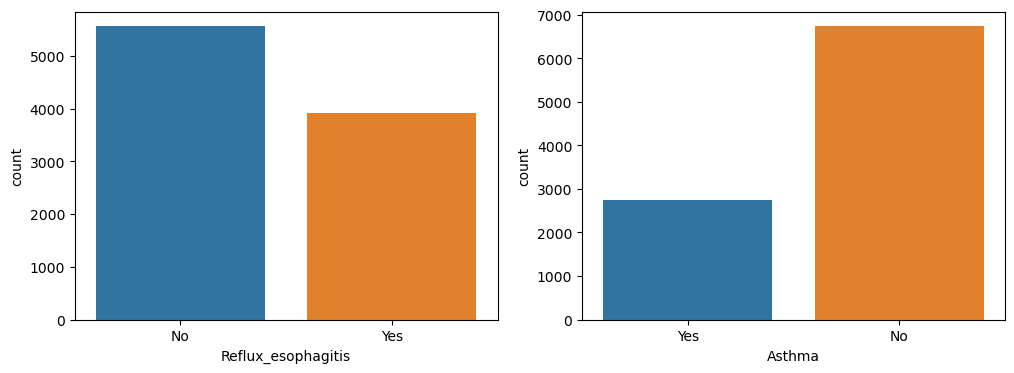

In [18]:
# Use bar charts rather than histograms for categorical variables - Seaborn countplot provides this functionality (Sudheer, 2023).
a=0
for col in cat_cols:
    if (a == 0) :    # Setup axes on every even iteration
        fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.countplot(x=df[col], ax=axs[a])
    a = (a + 1) % 2   # alternate graphs on left/right of display
    #plt.title(col)
    if (a == 1) :   # Show plot on every odd iteration
        plt.show

### Bivariate visualizations

#### Quantitative explanatory variables

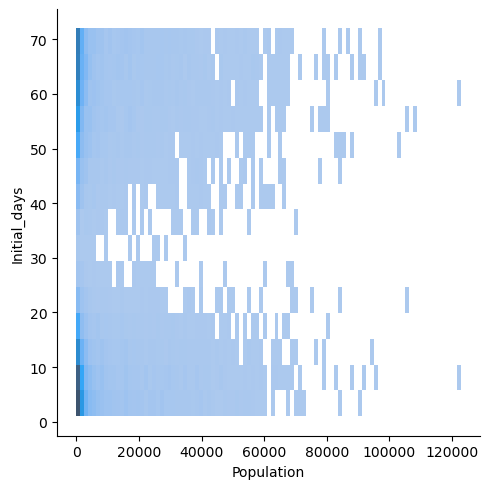

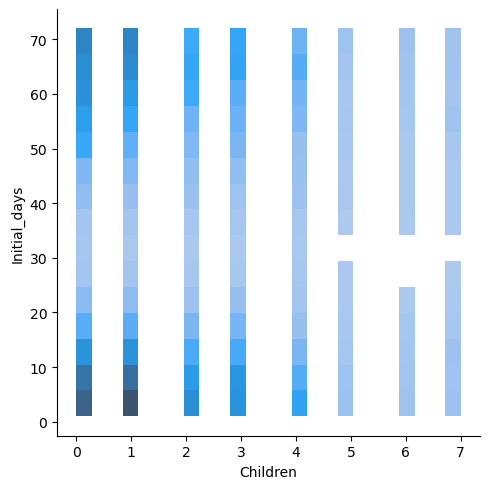

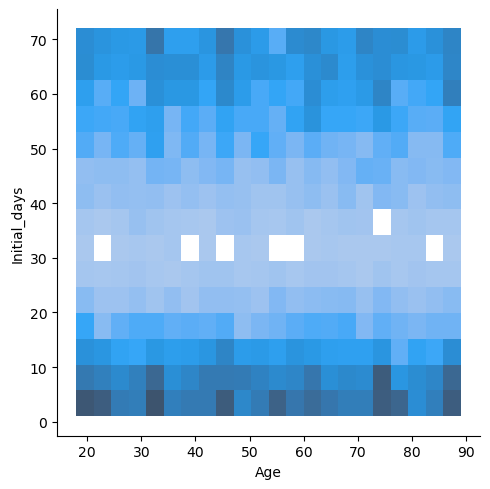

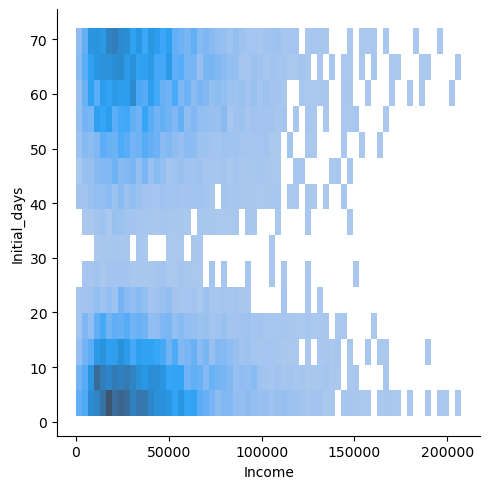

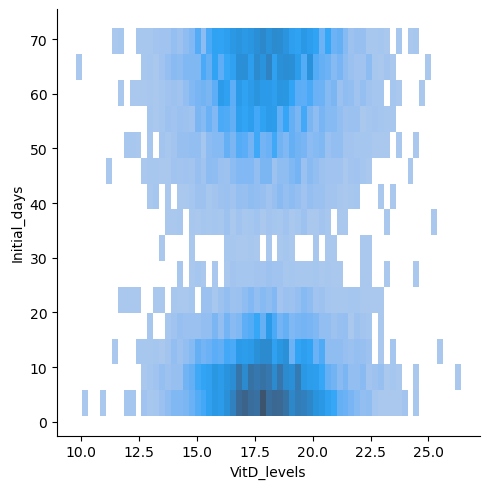

In [19]:
for col in quant_cols:
    sns.displot(x=df[col], y=df[target])
    plt.show

Also view log of `Population`, `Income`

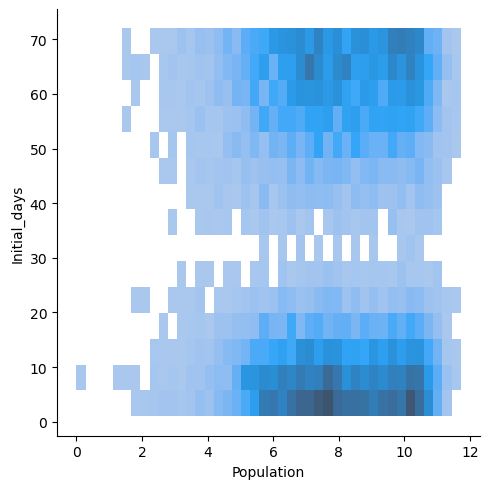

In [20]:
sns.displot(x=np.log(df.Population), y=df[target])

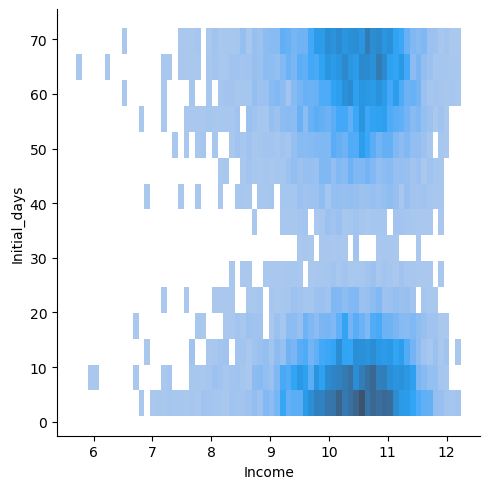

In [21]:
sns.displot(x=np.log(df.Income), y=df[target])

#### Categorical explanatory variables

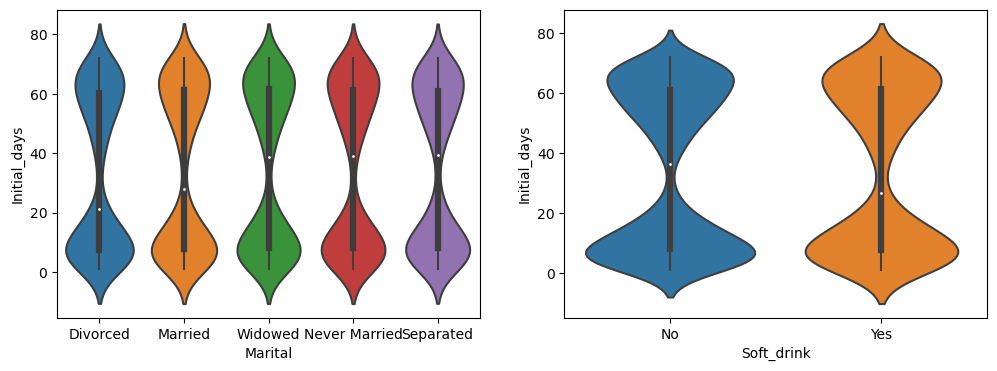

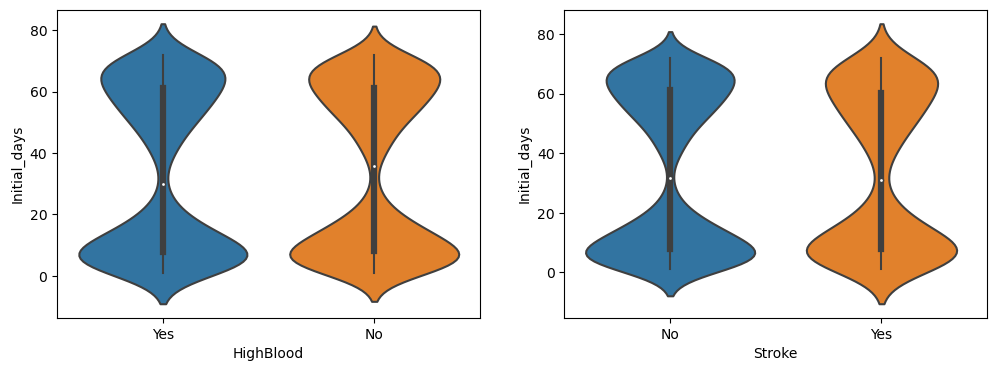

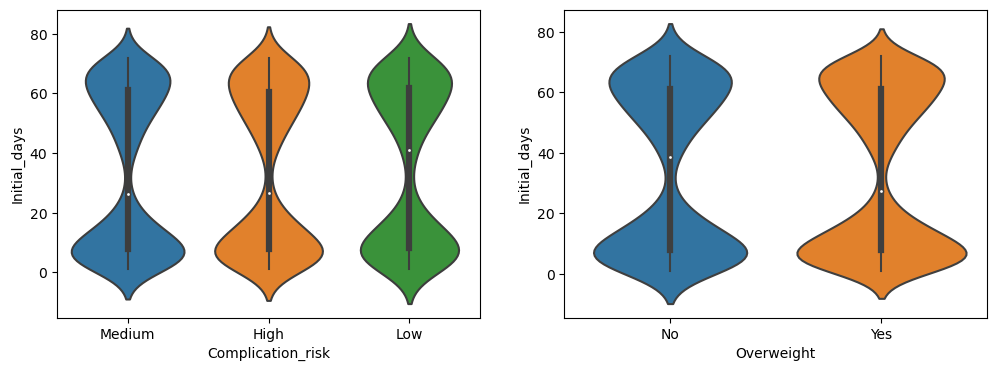

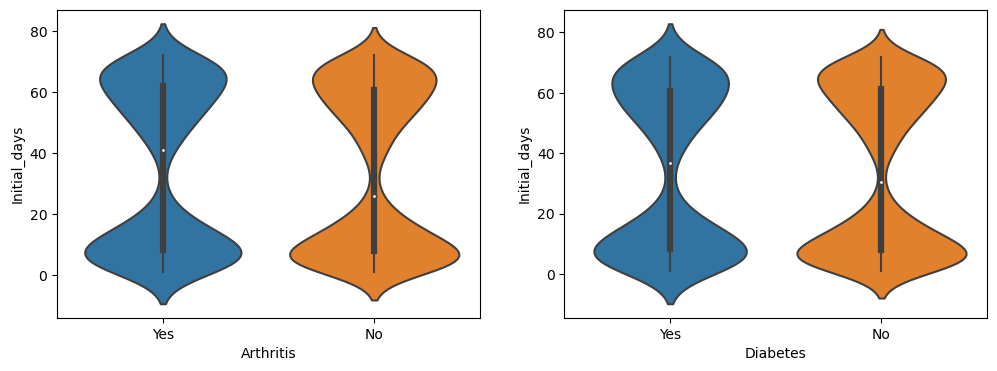

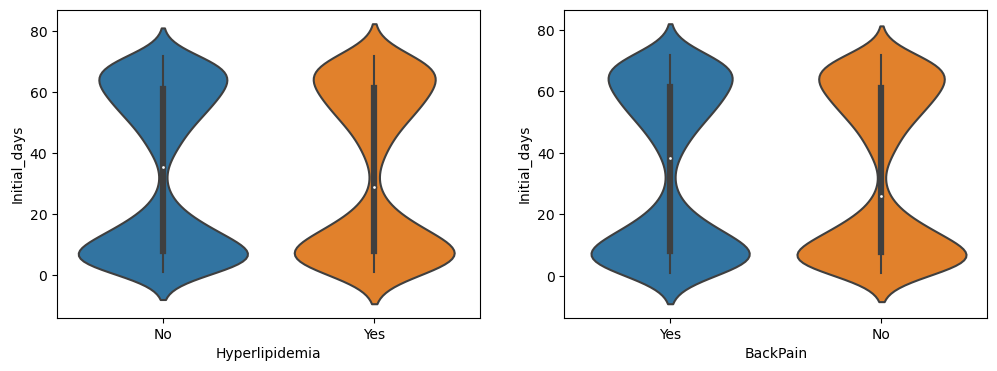

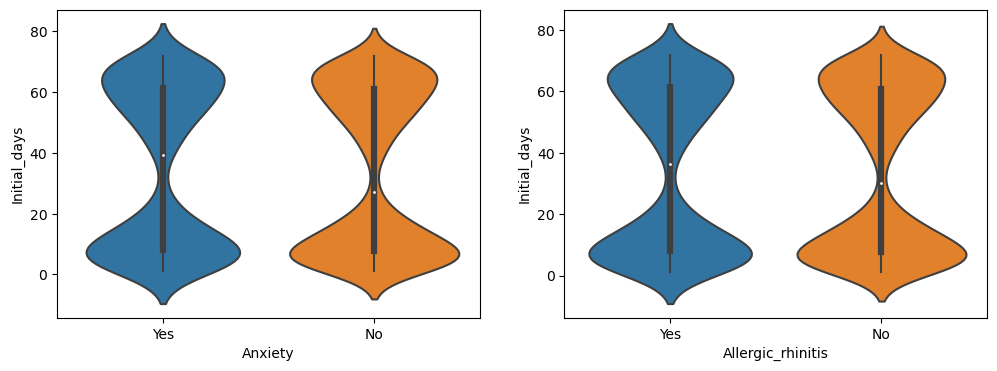

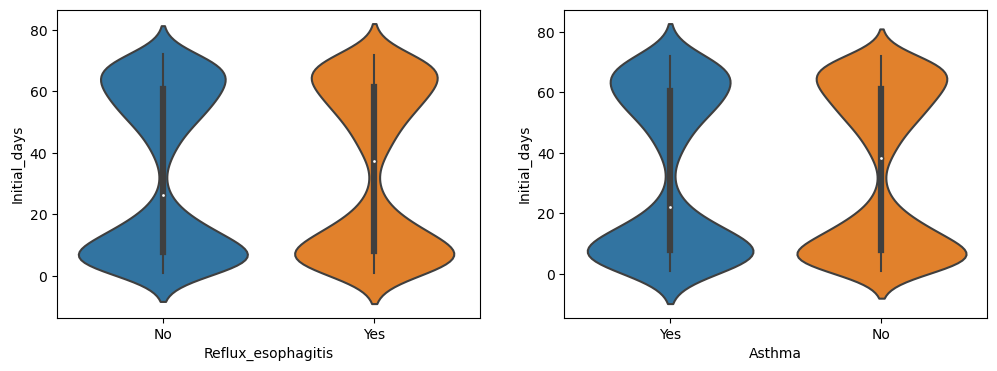

In [22]:
# Use violin charts rather than distribution plots for categorical variables
a=0
for col in cat_cols:
    if (a == 0) :    # Setup axes on every even iteration
        fig, axs = plt.subplots(1,2, figsize=(12,4))
    sns.violinplot(x=df[col], y=df[target], ax=axs[a])
    a = (a + 1) % 2   # alternate graphs on left/right of display
    #plt.title(col)
    if (a == 1) :   # Show plot on every odd iteration
        plt.show

## C4 - Data Wrangling
### Re-expressing Categorical Variables

In [23]:
# target variable dataframe
y = df[target].copy(deep=True)
# possible explanatory variables
X = df[quant_cols + cat_cols].copy(deep=True)

for col in cat_cols:
    print(df[col].unique())

['Divorced' 'Married' 'Widowed' 'Never Married' 'Separated']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Medium' 'High' 'Low']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


Set up dictionaries based on the above unique values in the data set. Code adapted from Larose & Larose (2019). `Marital` will be handled in the next code block.

In [24]:
dict_compl = {"Low": 1, "Medium": 2, "High": 3}
dict_yn = {"Yes": 1, "No": 0}
replace_dict = {'Soft_drink': dict_yn, 'HighBlood': dict_yn, 'Stroke': dict_yn, 'Complication_risk':dict_compl, 'Overweight': dict_yn,
                'Arthritis': dict_yn, 'Diabetes': dict_yn, 'Hyperlipidemia': dict_yn, 'BackPain': dict_yn, 'Anxiety': dict_yn, 
                'Allergic_rhinitis': dict_yn, 'Reflux_esophagitis': dict_yn, 'Asthma': dict_yn}
X.replace(replace_dict, inplace = True)
X.head()

,Population,Children,Age,Income,VitD_levels,Marital,Soft_drink,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
0,2951,1,53,86575.93,19.141466,Divorced,0,1,0,2,0,1,1,0,1,1,1,0,1
1,11303,3,51,46805.99,18.940352,Married,0,1,0,3,1,0,0,0,0,0,0,1,0
2,17125,3,53,14370.14,18.057507,Widowed,0,1,0,2,1,0,1,0,0,0,0,0,0
3,2162,0,78,39741.49,16.576858,Married,0,0,1,2,0,1,0,0,0,0,0,1,1
4,5287,1,22,1209.56,17.439069,Widowed,1,0,0,1,0,0,0,1,0,0,1,0,0


Set up dummy one-hot variables for `Marital`. Code adapted from Badole (2023). 
Per Dr. Middleton, using k-1 columns via the drop_first parameter in order to mitigate multicollinearity (2022). In this case, 'Divorced' is represented by 0's in all `Marital_*` columns.

In [25]:
X = pd.get_dummies(X, columns=['Marital'], drop_first=True)
X.head()

,Population,Children,Age,Income,VitD_levels,Soft_drink,HighBlood,Stroke,Complication_risk,Overweight,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
0,2951,1,53,86575.93,19.141466,0,1,0,2,0,...,0,1,1,1,0,1,0,0,0,0
1,11303,3,51,46805.99,18.940352,0,1,0,3,1,...,0,0,0,0,1,0,1,0,0,0
2,17125,3,53,14370.14,18.057507,0,1,0,2,1,...,0,0,0,0,0,0,0,0,0,1
3,2162,0,78,39741.49,16.576858,0,0,1,2,0,...,0,0,0,0,1,1,1,0,0,0
4,5287,1,22,1209.56,17.439069,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


### Logarithmic Transformations
I showed above that taking the log of `Population` and `Income` provide more normally-distributed populations.  I will replace these columns in the model data with the log othe original values.

In [26]:
X['Population'] = np.log(X.Population)
X['Income'] = np.log(X.Income)
X.rename(columns={'Population': 'logPop', 'Income': 'logIncome'}, inplace=True)
X.head()

,logPop,Children,Age,logIncome,VitD_levels,Soft_drink,HighBlood,Stroke,Complication_risk,Overweight,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
0,7.989899,1,53,11.368777,19.141466,0,1,0,2,0,...,0,1,1,1,0,1,0,0,0,0
1,9.332823,3,51,10.753766,18.940352,0,1,0,3,1,...,0,0,0,0,1,0,1,0,0,0
2,9.748295,3,53,9.572908,18.057507,0,1,0,2,1,...,0,0,0,0,0,0,0,0,0,1
3,7.678789,0,78,10.590151,16.576858,0,0,1,2,0,...,0,0,0,0,1,1,1,0,0,0
4,8.573006,1,22,7.098012,17.439069,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


## C5 - Output cleaned / transformed data set


In [27]:
df_out = pd.concat([y, X], axis=1)

df_out.to_csv('clean_xform_medical_data.csv', index=False)
df_out.head()

,Initial_days,logPop,Children,Age,logIncome,VitD_levels,Soft_drink,HighBlood,Stroke,Complication_risk,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
0,10.585770,7.989899,1,53,11.368777,19.141466,0,1,0,2,...,0,1,1,1,0,1,0,0,0,0
1,15.129562,9.332823,3,51,10.753766,18.940352,0,1,0,3,...,0,0,0,0,1,0,1,0,0,0
2,4.772177,9.748295,3,53,9.572908,18.057507,0,1,0,2,...,0,0,0,0,0,0,0,0,0,1
3,1.714879,7.678789,0,78,10.590151,16.576858,0,0,1,2,...,0,0,0,0,1,1,1,0,0,0
4,1.254807,8.573006,1,22,7.098012,17.439069,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


## D1 - Initial Model


In [28]:
# Code reference: (Brydon, 2021)
import statsmodels.api as sm

# Add constant term to explanatory variables
X_c = sm.add_constant(X)
kitchensink_mod = sm.OLS(y, X_c)
ks_res = kitchensink_mod.fit()

ks_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.448
Date:                Tue, 31 Oct 2023   Prob (F-statistic):             0.0801
Time:                        09:28:08   Log-Likelihood:                -44448.
No. Observations:                9483   AIC:                         8.894e+04
Df Residuals:                    9460   BIC:                         8.911e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    36.0295      4.667      7.720      0.000      26.881      45.178
logPop                    0.1546      0.145      1.067      0.286      -0.129       0.439
Children                  0.2719      0.159      1.710      0.087      -0.040       0.584
Age                       0.0265      0.013      2.023      0.043       0.001       0.052
logIncome                -0.3610      0.340     -1.060      0.289      -1.028       0.306
VitD_levels              -0.0815      0.134     -0.607      0.544      -0.345       0.182
Soft_drink               -0.0800      0.618     -0.129      0.897      -1.292       1.132
HighBlood                -0.2760      0.550     -0.502      0.616      -1.354       0.802
Stroke                   -0.3419      0.678     -0.505      0.614      -1.670       0.986
Complication_risk        -0.6080      0.370     -1.642      0.101      -1.334       0.118
Overweight               -0.3784      0.596     -0.635      0.525      -1.546       0.790
Arthritis                 1.1044      0.564      1.958      0.050      -0.001       2.210
Diabetes                  0.0155      0.609      0.025      0.980      -1.178       1.209
Hyperlipidemia           -0.0271      0.571     -0.047      0.962      -1.147       1.093
BackPain                  0.8192      0.550      1.490      0.136      -0.259       1.897
Anxiety                   0.7664      0.579      1.323      0.186      -0.369       1.902
Allergic_rhinitis         0.1218      0.553      0.220      0.826      -0.962       1.205
Reflux_esophagitis        0.5779      0.549      1.053      0.293      -0.498       1.654
Asthma                   -1.1172      0.596     -1.875      0.061      -2.285       0.051
Marital_Married           1.0688      0.858      1.246      0.213      -0.613       2.751
Marital_Never Married     1.6776      0.860      1.950      0.051      -0.009       3.364
Marital_Separated         1.6667      0.858      1.942      0.052      -0.016       3.349
Marital_Widowed           1.7898      0.854      2.097      0.036       0.116       3.463
==============================================================================
Omnibus:                    39453.465   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1208.233
Skew:                           0.073   Prob(JB):                    4.32e-263
Kurtosis:                       1.257   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                  feature        VIF
0                  logPop  18.036617
1                Children   2.135163
2                     Age   7.548419
3               logIncome  72.724188
4             VitD_levels  58.759649
5              Soft_drink   1.348601
6               HighBlood   1.693553
7                  Stroke   1.248962
8       Complication_risk   9.224481
9              Overweight   3.426015
10              Arthritis   1.558821
11               Diabetes   1.370969
12         Hyperlipidemia   1.509418
13               BackPain   1.707468
14                Anxiety   1.471926
15      Allergic_rhinitis   1.651467
16     Reflux_esophagitis   1.705025
17                 Asthma   1.409308
18        Marital_Married   2.007738
19  Marital_Never Married   1.997905
20      Marital_Separated   1.998714
21        Marital_Widowed   2.025495
                     logPop       Age  logIncome  VitD_levels  \
logPop             1.000000 -0.015294   0.005434     0.000300   
Age               -

<Axes: >

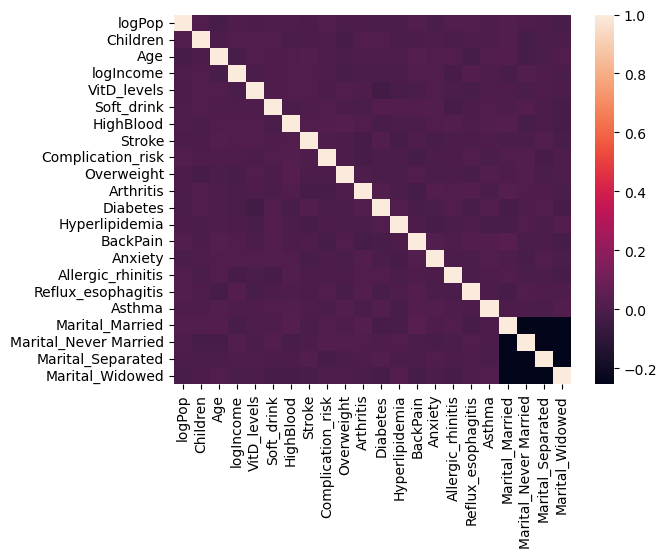

In [29]:

# Check for multicollinearity (Sewell, n.d.)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# Calc VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

print(X.loc[:, vif_data[vif_data.VIF > 5].feature].corr())
sns.heatmap(X.corr())

VIFs are high on full model, but no apparent high correlation between any pair of variables.

Proceed to reduce model

## D2 - Feature Selection

Eliminate features via backward stepwise elimination

In [30]:
# Get p-values from each feature
# .pvalues property produces a series with the feature names as the index (statsmodels.regression.linear_model.RegressionResults – statsmodels 0.15.0 documentation, n.d.)

pv_sort = ks_res.pvalues.sort_values()
# Get largest p-value & feature name from index
highest_pval = pv_sort[-1]
highest_pval_feature = pv_sort.index[-1]
# print(np.round(pv_sort,3))

# Make a working copy of our X dataframe
X_work = X_c.copy(deep=True)

# Iterate dropping feature with highest p-value, refit OLS with new feature set, check new p-values until all p-values < chosen alpha.
# choose alpha as 0.07 rather than standard 0.05 to keep at least 3 explanatory variables in the reduced model.
alpha = 0.07
while highest_pval > alpha :
    print("Dropping: ", highest_pval, highest_pval_feature)
    X_work = X_work.drop(columns=highest_pval_feature)
    reduce_mod = sm.OLS(y, X_work)
    rm_res = reduce_mod.fit()
    pv_sort = rm_res.pvalues.sort_values()
    # Get largest remaining p-value & feature name
    highest_pval = pv_sort[-1]
    highest_pval_feature = pv_sort.index[-1]
    
    


Dropping:  0.9797114120655122 Diabetes
Dropping:  0.9623130248946483 Hyperlipidemia
Dropping:  0.896706437561739 Soft_drink
Dropping:  0.8233669959519986 Allergic_rhinitis
Dropping:  0.6182733603634976 HighBlood
Dropping:  0.6105642259770176 Stroke
Dropping:  0.5372337335723536 VitD_levels
Dropping:  0.5140462364048015 Overweight
Dropping:  0.2881727592985387 logIncome
Dropping:  0.2946914929821207 Reflux_esophagitis
Dropping:  0.2813898760011672 logPop
Dropping:  0.2143943644506891 Marital_Married
Dropping:  0.19404776973231588 Anxiety
Dropping:  0.13030108455179462 Marital_Never Married
Dropping:  0.2801027396540714 Marital_Separated
Dropping:  0.30572601176018277 Marital_Widowed
Dropping:  0.13316898873354896 BackPain
Dropping:  0.09743421001249894 Children
Dropping:  0.09720948777866342 Complication_risk


## D3 - Reduced LR model

In [31]:
X_red = X_work.copy(deep=True)
print(X_red.head())
rm_res.summary()


   const  Age  Arthritis  Asthma
0    1.0   53          1       1
1    1.0   51          0       0
2    1.0   53          0       0
3    1.0   78          1       1
4    1.0   22          0       0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.870
Date:                Tue, 31 Oct 2023   Prob (F-statistic):            0.00887
Time:                        09:28:09   Log-Likelihood:                -44458.
No. Observations:                9483   AIC:                         8.892e+04
Df Residuals:                    9479   BIC:                         8.895e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8856      0.794     41.437      0.000      31.330      34.441
Age            0.0263      0.013      2.010      0.045       0.001       0.052
Arthritis      1.1585      0.563      2.056      0.040       0.054       2.263
Asthma        -1.0883      0.595     -1.828      0.068      -2.255       0.079
==============================================================================
Omnibus:                    39206.426   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1217.286
Skew:                           0.074   Prob(JB):                    4.67e-265
Kurtosis:                       1.251   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Check for multicollinearity on reduced feature set

     feature       VIF
0        Age  1.762416
1  Arthritis  1.458779
2     Asthma  1.346927
                Age  Arthritis    Asthma
Age        1.000000   0.004386  0.011644
Arthritis  0.004386   1.000000 -0.006415
Asthma     0.011644  -0.006415  1.000000


<Axes: >

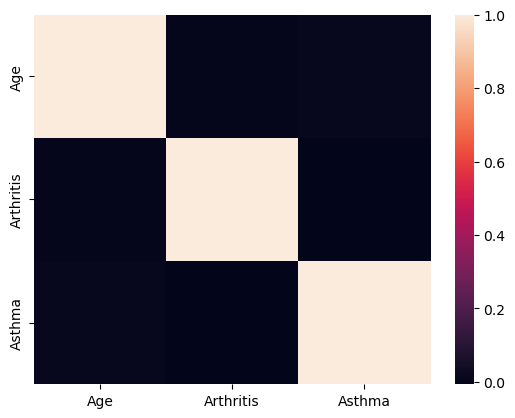

In [32]:
# Check for multicollinearity (Sewell, n.d.)
#from statsmodels.stats.outliers_influence import variance_inflation_factor
X_red_without_const = X_red.drop(columns='const')
red_vif_data = pd.DataFrame()
red_vif_data['feature'] = X_red_without_const.columns

# Calc VIF for each feature
red_vif_data['VIF'] = [variance_inflation_factor(X_red_without_const.values, i) for i in range(len(X_red_without_const.columns))]

print(red_vif_data)

print(X_red_without_const.corr())
sns.heatmap(X_red_without_const.corr())

## E1 - Model comparison



#### F-statistic p-value

In [33]:
print("Prob(F-stat) of original model: ", np.round(ks_res.f_pvalue,3))
print("Prob(F-stat) of reduced model: ", np.round(rm_res.f_pvalue,3))

Prob(F-stat) of original model:  0.08
Prob(F-stat) of reduced model:  0.009


#### Adjusted R-squared

In [34]:
print("Adjusted R-squared of original model: ", np.round(ks_res.rsquared_adj,3))
print("Adjusted R-squared of reduced model: ", np.round(rm_res.rsquared_adj,3))

Adjusted R-squared of original model:  0.001
Adjusted R-squared of reduced model:  0.001


## E2 - Output

#### RSE

In [35]:
# Code ref: (Van den Broeck 1, n.d.)
# original model RSE
print("RSE of original model: ", np.round(np.sqrt(ks_res.mse_resid),3))
# revised model RSE
print("RSE of reduced model: ", np.round(np.sqrt(rm_res.mse_resid),3))

RSE of original model:  26.294
RSE of reduced model:  26.296


#### Residual plots

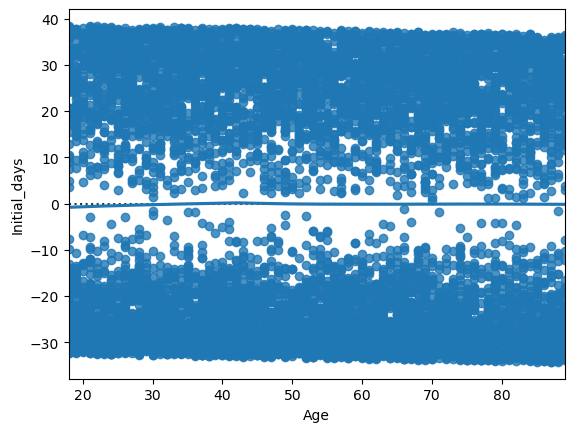

In [36]:
# Code ref: (Van den Broeck 1, n.d.)
sns.residplot(data=df_out, x='Age', y='Initial_days', lowess=True)
plt.show()

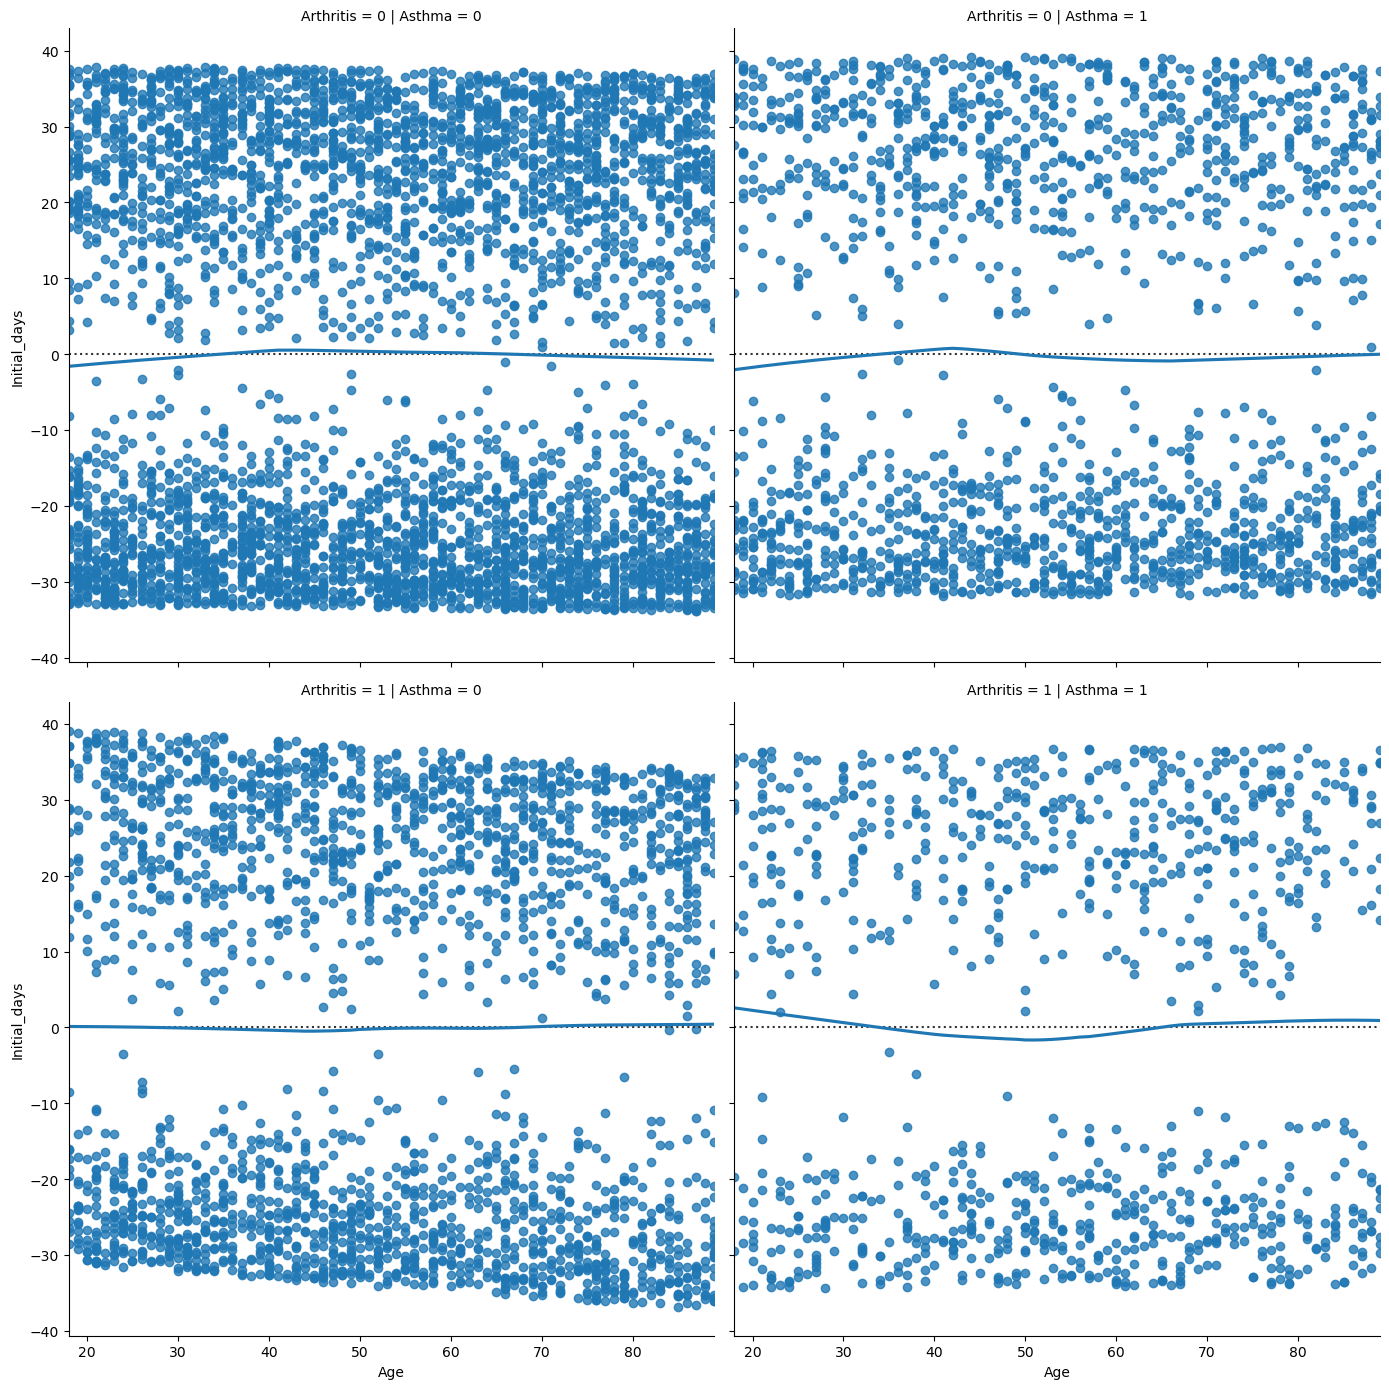

In [37]:
#Code ref: (Van de Broeck 2, n.d.)
grid = sns.FacetGrid(data=df_out,
            col="Asthma", row="Arthritis", height=7)


grid.map(sns.residplot, "Age",
         "Initial_days", lowess=True)


plt.show()

#### Q-Q plot

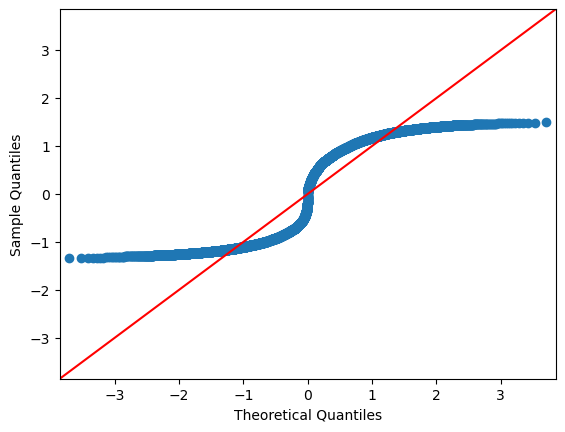

In [38]:
# Code ref: (Van den Broeck 1, n.d.)
from statsmodels.api import qqplot
qqplot(data=rm_res.resid, fit=True, line="45")
plt.show()